Understand the Data:

Import necessary libraries.

Load the dataset.

Explore the dataset to understand its structure and characteristics.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Explore the dataset
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Data Preprocessing:

Handle missing values if any.

Encode categorical variables if needed.

Scale/normalize numerical features.

In [2]:
# Handle missing values if any (if needed)
data.dropna(inplace=True)

# Encode categorical variables (if Gender is categorical)
# You can use LabelEncoder or One-Hot Encoding

# Scale/normalize numerical features (Age, Annual Income, Spending Score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


Machine Learning Approach with Clustering Algorithm (K-Means):

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


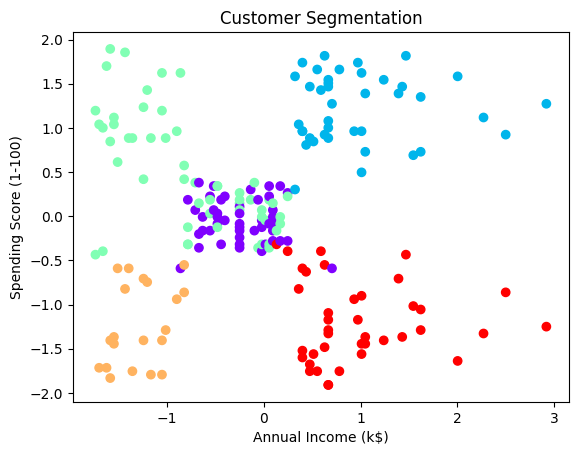

In [3]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans

# Select the features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Choose the number of clusters (you can determine this through techniques like the Elbow Method)
k = 5

# Initialize the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Explore the results
data['Cluster'].value_counts()  # Count of customers in each cluster

# Visualize the clusters (you can use matplotlib or seaborn for this)
import matplotlib.pyplot as plt

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()
